# Exámen parcial 2
### Erika Regina Robles Reyes
 El archivo cancun.csv contiene el interés por los usuarios de Google desde el 2004 a la fecha. Supongamos que trabajan para una cadena hotelera y les piden ajustar las tarifas de los cuartos de hotel de acuerdo con la demanda esperada en los próximos meses.


El objetivo de este examen es realizar un informe justificando un alza/baja en los precios de los hoteles dada la demanda esperada por potenciales clientes.


###### Librerías.


In [298]:
import pandas as pd #Biblioteca para manipulación de marcos de datos.
import numpy as np #Biblioteca de funciones matemáticas.
import matplotlib.pyplot as plt #Biblioteca para dar salida a los gráficos.
import statsmodels.api as sm #Biblioteca para la estimación de modelos estadísticos.
import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadisticos y realizar pruebas estadisticas.
from pandas.plotting import scatter_matrix #Herramienta de Pandas para diagramas de dispersión en matriz.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Herramienta de statsmodels para acf y pacf.
import matplotlib.colors as mcolors #Biblioteca para poner colores a las gráficas.
from statsmodels.tsa.arima_model import ARIMA #Biblioteca para el modelo ARIMA.
from scipy.stats import norm #Biblioteca para la distribución normal

##### Datos.


Dataset: Cancún

In [149]:
#Ruta del archivo de datos
#Cargando los datos 
dfcancun = pd.read_csv("cancun.csv", header=1)
#Desplegando la tabla para conocer su integración
dfcancun.head()

,Mes,Cancún: (Estados Unidos)
0,2004-01,75
1,2004-02,77
2,2004-03,78
3,2004-04,65
4,2004-05,59


In [150]:
#Estableciendo el Mes cómo el valor a estudiar
dfcancun.set_index('Mes',inplace=True)
dfcancun.columns=['value']
dfcancun.index= pd.to_datetime(dfcancun.index)


In [151]:
dfcancun.head()

,value
Mes,
2004-01-01,75
2004-02-01,77
2004-03-01,78
2004-04-01,65
2004-05-01,59


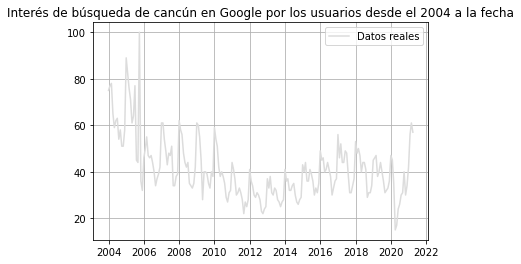

In [152]:
#Conociendo la distribución de los datos
plt.title("Interés de búsqueda de cancún en Google por los usuarios desde el 2004 a la fecha")
plt.plot(dfcancun, label="Datos reales", color="gainsboro")
plt.grid(True)
plt.legend(loc = "best")

## 1. ¿La serie de tiempo es estacionaria?

Observaremos el comportamiento de la media móvil, la desviación estándar y la primera diferencia de la media móvil para poder establecer si existe una estacionariedad de nuestros datos y de ser así poder hacer correciones sobre los datos reales.

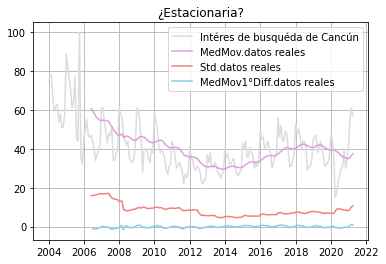

In [317]:
plt.title("¿Estacionaria?")
plt.plot(dfcancun, label="Intéres de busquéda de Cancún", color= "gainsboro")
plt.plot(dfcancun.rolling(window=30).mean(), label="MedMov.datos reales", color="plum") #Media
plt.plot(dfcancun.rolling(window=30).std(), label="Std.datos reales", color="lightcoral") #Desviación estandar
plt.plot(dfcancun.diff().rolling(window=30).mean(), label="MedMov1°Diff.datos reales", color="skyblue") #Primera diferencia
plt.grid(True)
plt.legend(loc = "best")

Haciendo las gráficas por separado para poder apreciarlas mejor.

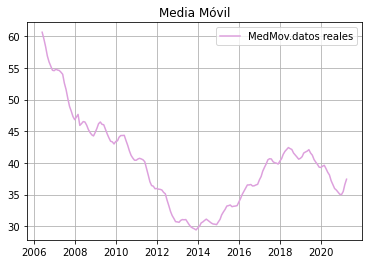

In [154]:
#Media móvil
plt.title("Media Móvil")
plt.plot(dfcancun.rolling(window=30).mean(), label="MedMov.datos reales", color="plum") #Media
plt.grid(True)
plt.legend(loc = "best")

Notamos que la media móvil muestra que no existe una estacionariedad sobre los datos reales.

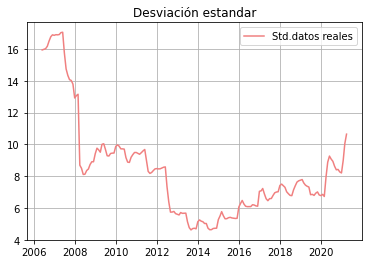

In [155]:
#Desviación estandar
plt.title("Desviación estandar")
plt.plot(dfcancun.rolling(window=30).std(), label="Std.datos reales", color="lightcoral") #Desviación estandar
plt.grid(True)
plt.legend(loc = "best")

Notamos que al igual que la media móvil la desviación estándar tampo es estacionaria sobre los datos reales.

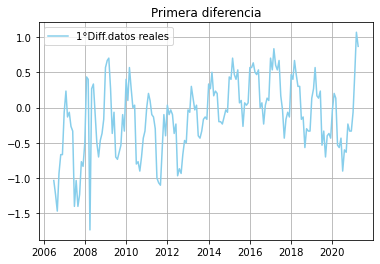

In [316]:
#Primera diferencia
plt.title("Primera diferencia")
plt.plot(dfcancun.diff().rolling(window=30).mean(), label="1°Diff.datos reales", color="skyblue") #Primera diferencia
plt.grid(True)
plt.legend(loc = "best")

Observamos que la media de las primeras diferencias (entre un día y otro) maneja un rango menor que la media y desviación estándar de los datos reales, lo cuál nos ayuda a que la serie se aproxime a ser estacionaria.

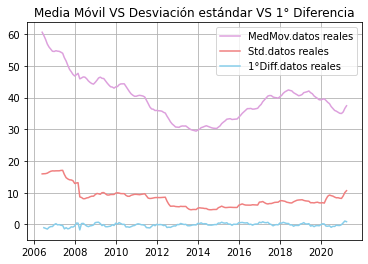

In [157]:
#Impresión de todas en un solo gráfico
plt.title("Media Móvil VS Desviación estándar VS 1° Diferencia")
plt.plot(dfcancun.rolling(window=30).mean(), label="MedMov.datos reales", color="plum") #Media
plt.plot(dfcancun.rolling(window=30).std(), label="Std.datos reales", color="lightcoral") #Desviación estandar
plt.plot(dfcancun.diff().rolling(window=30).mean(), label="1°Diff.datos reales", color="skyblue") #Primera diferencia
plt.grid(True)
plt.legend(loc = "best")

#### Conclusión: La serie de datos de Cancún se puede apreciar como no estacionaria debido a los gráficos anteriormente calculados. Trayendo como consecuencia que se deba realizar una transformación a la serie de datos de Cancún.

##### Transformación de la serie de datos de Cancún.

Anteriormente ya se calculó la primera diferencia, ahora haremos la segunda, tercera y cuarta; esto con la finalidad de establecer que diferencia es la que vamos a utilizar para la eliminación de la tendencia de la serie de datos de Cancún.

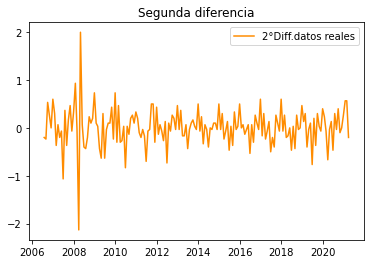

In [158]:
#Segunda diferencia
plt.title("Segunda diferencia")
plt.plot(dfcancun.diff().diff().rolling(window=30).mean(), label="2°Diff.datos reales", color="darkorange") #Segunda diferencia
plt.legend(loc = "best")

Observamos que al aplicar una segunda diferencia nuestro rango de datos aumenta en uno positivo y .5 negativo sin embargo, la variación de los datos se encuentra más acotados entre los valores 1 y -1, sin contar que tenemos un pico bastante pronunciado entre 2008 y 2010.

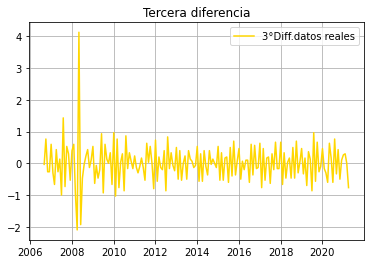

In [315]:
#Tercera diferencia
plt.title("Tercera diferencia")
plt.plot(dfcancun.diff().diff().diff().rolling(window=30).mean(), label="3°Diff.datos reales", color="gold") #Tercera diferencia
plt.grid(True)
plt.legend(loc = "best")

Observamos que al aplicar una tercera diferencia nuestro rango de datos sigue aumentando sin embargo la variación de los datos se encuentra más acotados que en la segunda diferencia, contando que se "añadió" un nuevo pico negativo entre 2008y 2010.

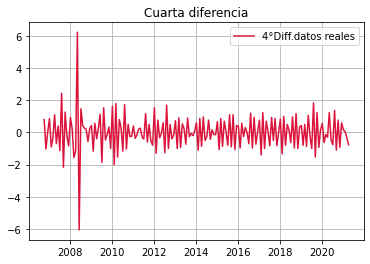

In [314]:
#Cuarta diferencia
plt.title("Cuarta diferencia")
plt.plot(dfcancun.diff().diff().diff().diff().rolling(window=30).mean(), label="4°Diff.datos reales", color="crimson") #Cuarta diferencia
plt.grid(True)
plt.legend(loc = "best")

Observamos que al aplicar una cuarta diferencia nuestro rango de datos sigue aumentando,la variación de los datos se encuentra más acotados que en la tercera diferencia, el nuevo pico negativo de la tercera diferencia ya no se encuentra y sólo se tiene el mismo que de la segunda diferencia entre 2008 y 2010.

Entonces las diferencias que son candidatas a usarse para esta serie de tiempo serían la primera y la segunda.

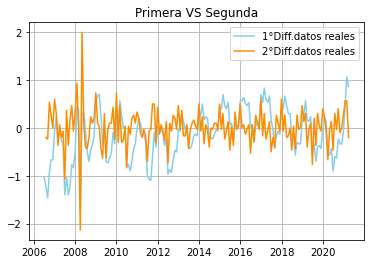

In [313]:
plt.title("Primera VS Segunda")
plt.plot(dfcancun.diff().rolling(window=30).mean(), label="1°Diff.datos reales", color="skyblue") #Primera diferencia
plt.plot(dfcancun.diff().diff().rolling(window=30).mean(), label="2°Diff.datos reales", color="darkorange") #Segunda diferencia
plt.grid(True)
plt.legend(loc = "best")

#### Conclusión: Utilizaremos la primera diferencia ya que no se cuenta con un pico pronunciado como en la segunda, y de esta misma forma nuestro rango de valores es menor por lo que la primera diferencia será la elegida.

## 2. ¿Qué nos dice la ACF y la PACF de la serie original y de sus posibles transformaciones?

Observaremos primero la ACF y PACF de la serie original

##### ACF

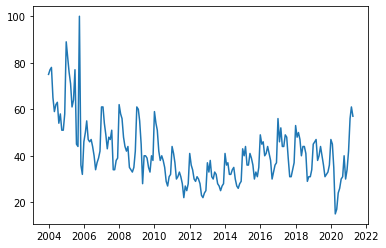

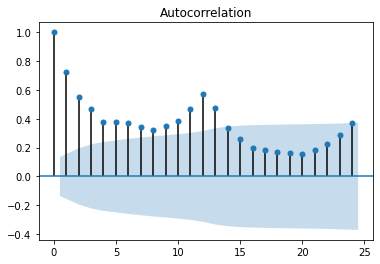

In [162]:
#ACF de la serie original
dfcancun_original=dfcancun.dropna()
plt.plot(dfcancun_original)
plot_acf(dfcancun_original)
plt.show()

Observando la autocorrelación de los datos originales nos damos cuenta que a tiempo cero la autocorrelación es de 1, los datos decrecen rápidamente en los lags 1 a 8, mientras que en los lags de 9 a 12 crecen teniendo en 12 el tercer pico más alto y posteriormente en los lags de 13 a 24 decrece de manera gradual. Es decir la autocorrelación es persistente de 0 a 8 pero de 9 a 12 se rompe la persistencia.

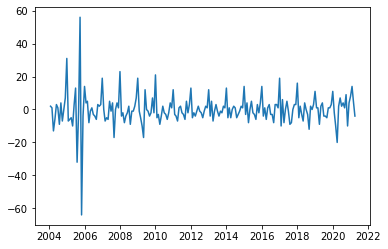

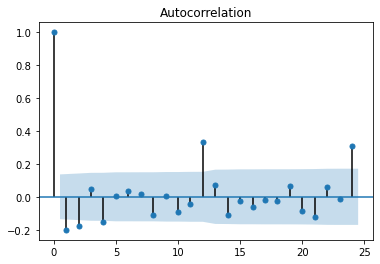

In [163]:
#ACF de la transformación con una diferencia
dfcancun_1dif=dfcancun.diff().dropna()
plt.plot(dfcancun_1dif)
plot_acf(dfcancun_1dif)
plt.show()

A tiempo cero tenemos correlación de 1, mientras que en los lags 1 a 11 y 13 a 23 la correlación no es persistente ya que tiene tanto positivos como negativos, mientras que en los saltos que se registran en 12 y 24 nos dice que la serie esta correlacionada con 12 o 24 días en adelante.


Observaremos la dispersión...

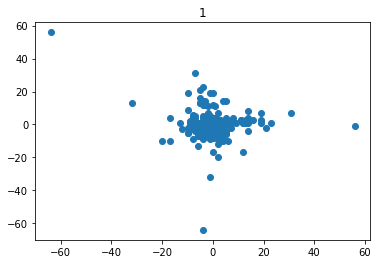

In [164]:
plt.title("1")
plt.scatter(dfcancun.diff(),dfcancun.diff().shift(1))

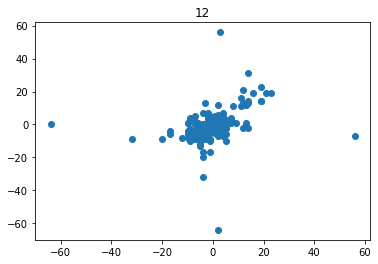

In [165]:
plt.title("12")
plt.scatter(dfcancun.diff(),dfcancun.diff().shift(12))

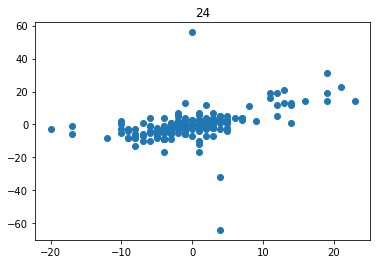

In [166]:
plt.title("24")
plt.scatter(dfcancun.diff(),dfcancun.diff().shift(24))

Observamos que en los picos de nuestra función de autocorrelación con la primera diferencia tenemos la posibilidad de que se pueda trazar una linea recta.

##### PACF

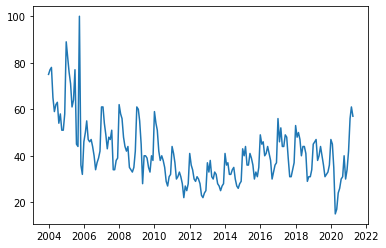

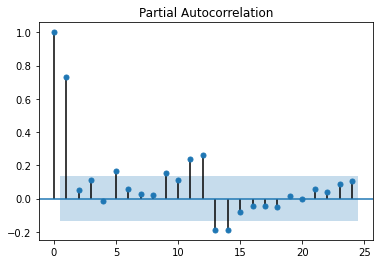

In [167]:
#PACF de la serie original
dfcancun_originalpacf=dfcancun.dropna()
plt.plot(dfcancun_originalpacf)
plot_pacf(dfcancun_originalpacf)
plt.show()

Para estos datos obtenemos que existe una correlación significativa del lag 0 a 1 y para los posteriores se observa un decrecimiento.

Observaremos la primera diferencia de la PACF debido a que al calcular la ACF con anterioridad especificamos que la primera diferencia sería óptima para la realización de un buen modelo.

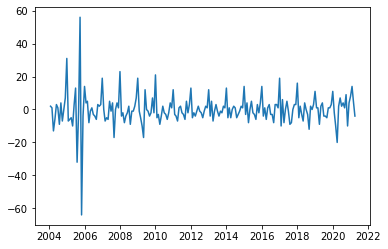

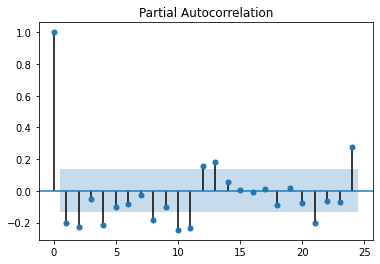

In [225]:
#PACF de la transformación con una diferencia
dfcancun_1difpacf=dfcancun.diff().dropna()
plt.plot(dfcancun_1difpacf)
plot_pacf(dfcancun_1difpacf)
plt.show()

Comparando la PACF con la primera diferencia y la PACF optaremos por tomar la PACF sin diferencia debido a que cuenta con menos lags negativos.


## 3. ¿Qué modelo le ajustarías a la serie de tiempo?

Para esto tomaremos una q=1 debido a que el primer término negativo de la función de autocorrelación la tenemos en el lag 1, d=1 ya que es la diferencia que optamos por usar en la transformación y q=1 conforme a lo concluido con la PACF.

##### Aplicación del modelo ARIMA (1,1,1)

In [204]:
# 1,1,1 ARIMA Model
model = ARIMA(dfcancun.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  207
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -737.643
Method:                       css-mle   S.D. of innovations              8.520
Date:                Thu, 08 Apr 2021   AIC                           1483.286
Time:                        21:27:16   BIC                           1496.617
Sample:                    02-01-2004   HQIC                          1488.677
                         - 04-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1240      0.106     -1.170      0.242      -0.332       0.084
ar.L1.D.value     0.5148      0.073      7.045      0.000       0.372       0.658
ma.L1.D.value    -0.9175      0.031    -

In [205]:
#Comprobación de AIC
a= model_fit.aic
a

1483.2864190314863

C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


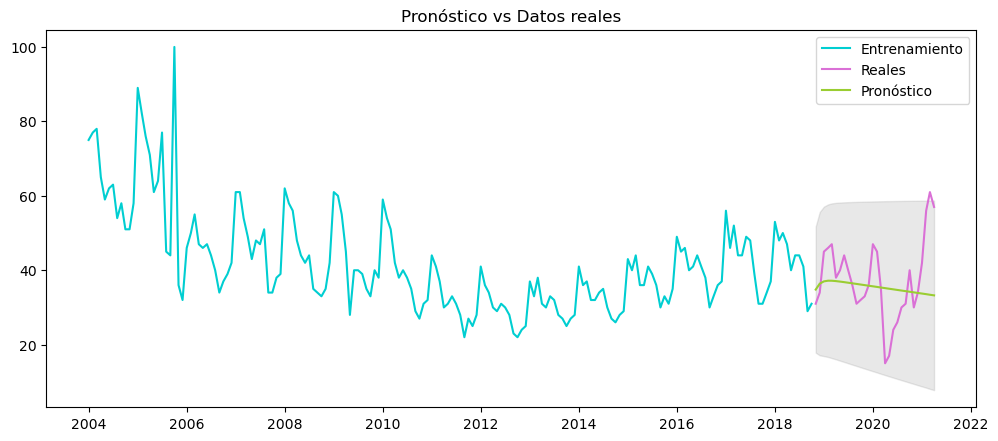

In [222]:
h = 30
#Entrenamiento y prueba de los datos
train = dfcancun.value[:(208-h)]
test = dfcancun.value[(208-h):]

# Creación del modelo
# model = ARIMA(train, order=(1,1,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=0)  

# Pronóstico
fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Impresión del gráfico
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Entrenamiento', color="darkturquoise")
plt.plot(test, label='Reales', color="orchid")
plt.plot(fc_series, label='Pronóstico', color ="yellowgreen")
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='dimgray', alpha=.15)
plt.title('Pronóstico vs Datos reales')
plt.legend(loc='best', fontsize=10)
plt.show()

Este modelo ARIMA(1,1,1) se ajusta bien en cuánto a estadísticos y la gráfica de pronósticos del modelo es factible aunque se ceunte con una tendencia a la baja sin embargo, el ajuste sigue siendo óptimo a la serie de datos de Cancún.
Lo que este pronóstico representa es que el interés de buscar Cancún en Google pueda ser menor con relación a años anteriores.

Sólo para estar seguros que el modelo ARIMA(1,1,1) es el que mejor se ajusta a nuestros datos reales haremos un modelo ARIMA (2,1,1).

##### Aplicación del modelo ARIMA (2,1,1)

In [223]:
# 1,1,1 ARIMA Model
model = ARIMA(dfcancun.value, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  207
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -737.267
Method:                       css-mle   S.D. of innovations              8.504
Date:                Thu, 08 Apr 2021   AIC                           1484.533
Time:                        21:41:56   BIC                           1501.197
Sample:                    02-01-2004   HQIC                          1491.272
                         - 04-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1255      0.107     -1.174      0.240      -0.335       0.084
ar.L1.D.value     0.5335      0.077      6.954      0.000       0.383       0.684
ar.L2.D.value    -0.0647      0.074     

C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


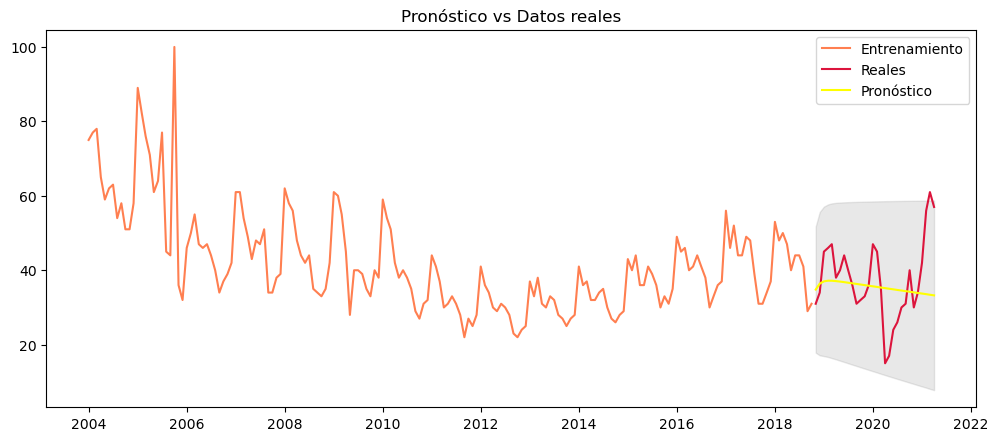

In [224]:
h = 30
#Entrenamiento y prueba de los datos
train = dfcancun.value[:(208-h)]
test = dfcancun.value[(208-h):]

# Creación del modelo
# model = ARIMA(train, order=(1,1,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=0)  

# Pronóstico
fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Impresión del gráfico
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Entrenamiento', color="coral")
plt.plot(test, label='Reales', color="crimson")
plt.plot(fc_series, label='Pronóstico', color ="yellow")
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='dimgray', alpha=.15)
plt.title('Pronóstico vs Datos reales')
plt.legend(loc='best', fontsize=10)
plt.show()

Este modelo ARIMA(2,1,1) cuenta con estadísticos menos factibles en comparación con el modelo ARIMA(1,1,1) y la gráfica de pronósticos del modelo ARIMA (2,1,1) es similar al de ARIMA(1,1,1).


#### Conclusión: Basándonos en los estadísticos obtenidos de ambo modelos se comprobó que el que mejor se ajusta a los datos es el ARIMA (1,1,1). En cuánto a la gráfica no se aprecia un diferencia significativa, en ambos modelos se tiene una tendencia de decrecimiento sin embargo, el pronóstico se ajusta bien a los datos reales.

## 4. Respecto a los errores provenientes del modelo ARIMA (1,1,1), ¿Cómo se comportan?
### Justifica si los errores son independientes o están autocorrelados. ¿Dichos errores se distribuyen normal?

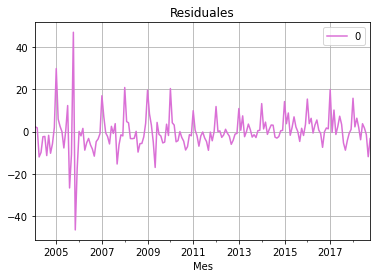

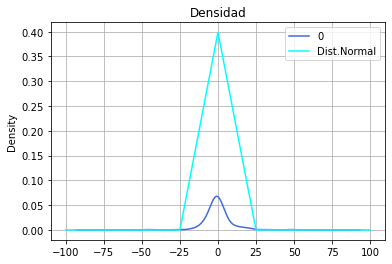

                0
count  177.000000
mean    -0.158497
std      8.692480
min    -46.421600
25%     -3.536497
50%     -0.821946
75%      2.978528
max     46.831712


In [305]:
dfcancun_res=pd.DataFrame(model_fit.resid)
dfcancun_res.plot(title="Residuales", color="orchid", grid=True)
plt.show()
dfcancun_res.plot(kind="kde", title="Densidad", color="royalblue", grid =True)
range = np.arange(-100,125,25)
plt.plot( range, norm.pdf(range,0,1),label="Dist.Normal", color="cyan")
plt.legend(loc='best', fontsize=10)
plt.show()
print(dfcancun_res.describe())

Observamos con respecto a la gráfica de residuales que los errores se encuentran en torno a la media = 0. Con respecto a la gráfica de densidad que nuestros errores se ajustan a una distribución normal, lo cuál se podría asumir que el modelo es confiable.
Sin embargo obtendremos otras métricas para comprobar.

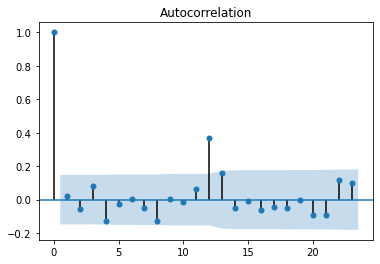

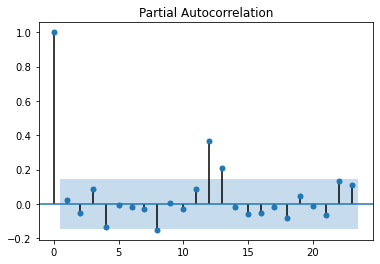

In [312]:
#Autocorrelación de los errores
plot_acf(dfcancun_res)
plt.show()
plot_pacf(dfcancun_res)
plt.show()

Observamos que se puede deducir que en el lag 12 existe una autocorrleación con respecto a la ACF Y PACF. Pero esto no es un valor significativo por lo concluimos que los residuos son independientes .

In [256]:
# Metricas de precisión
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Erika Regina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.23987292735539786,
 'me': -2.021491194508112,
 'mae': 7.977794425821896,
 'mpe': 0.040206689900380725,
 'rmse': 10.815965444154514,
 'acf1': 0.7064573970364925,
 'corr': -0.07074071091210662,
 'minmax': 0.18464656004334423}

El error medio cuadrático no es tan pequeño y se deduce que los valores pronosticados con los reales no son tan cercanos.

## 5. ¿Qué decisión tomarías respecto a elevar / disminuir el costo de las habitaciones de hotel en diciembre de este año?

Respecto a la proyección obtenida con el modelo, mi decisión para diciembre de este año sería elevar los costos de las habitaciones mientras siga el interés por buscar cancún. Aunque teniendo un pronóstico con tendencia a la baja es una decisón arriesgada considero que los datos reales apoyaran esta decisión.
